# Add MollWeide Plotting to gwylm class
<center>(L. London 2017) Related: positive_dev/examples/plotting_spherical_harmonics.ipynb</center>

### Setup Environment

In [45]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import usefuls
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *
from numpy import array

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find a simulation and load data

In [20]:
# Find sim
A = scsearch(q=[10,20],keyword='hr',verbose=True,institute='gt')

(scsearch)>> Found institute (='gt') keyword.
(scsearch)>> Found keyword (='hr') keyword.
(scsearch)>> Found q (=[10, 20]) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HR-series: ns-q15.04	(D7.5_q15.00_a0.0_CHgEEB_m800)



In [36]:
# Load data
y = gwylm(A[0],lmax=4,verbose=False,clean=True)

(validate!)>> Multiple catalog directories found. We will scan through the related list, and then store first the catalog_dir that the OS can find.
(validate!)>> Selecting "/Volumes/athena/bradwr/"


### Plot Mollweide

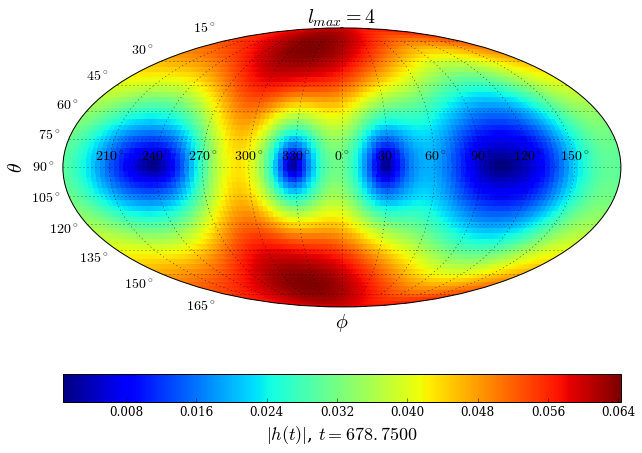

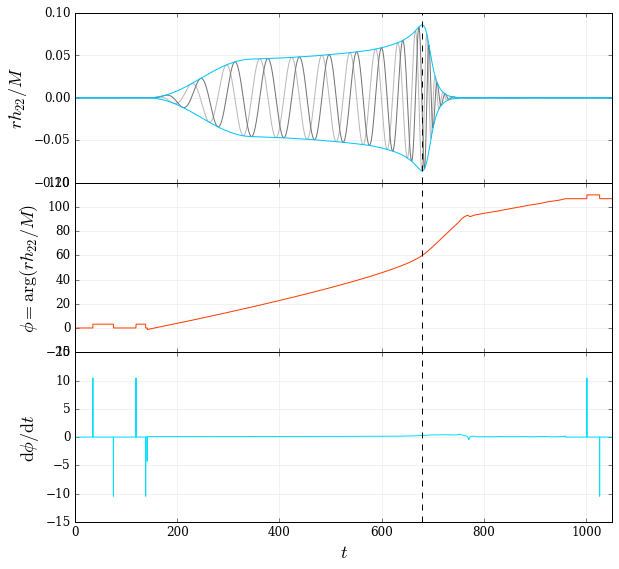

In [61]:

#
kind = 'strain'

# Make mollweide plot -- NOTE that the time input is relative to the peak in h22
ax0,real_time = y.mollweide_plot(time=0,form='abs',kind=kind)
ax0.set_title('$l_{max} = %i$'%max([l for l,m in y.lm]),size=20)

# Make time domain plot for reference
axarr,fig = y.lm[2,2][kind].plot()
for ax in axarr:
    sca( ax )
    axvline( real_time, linestyle='--', color='k' )


### Try to put everything in the same figure

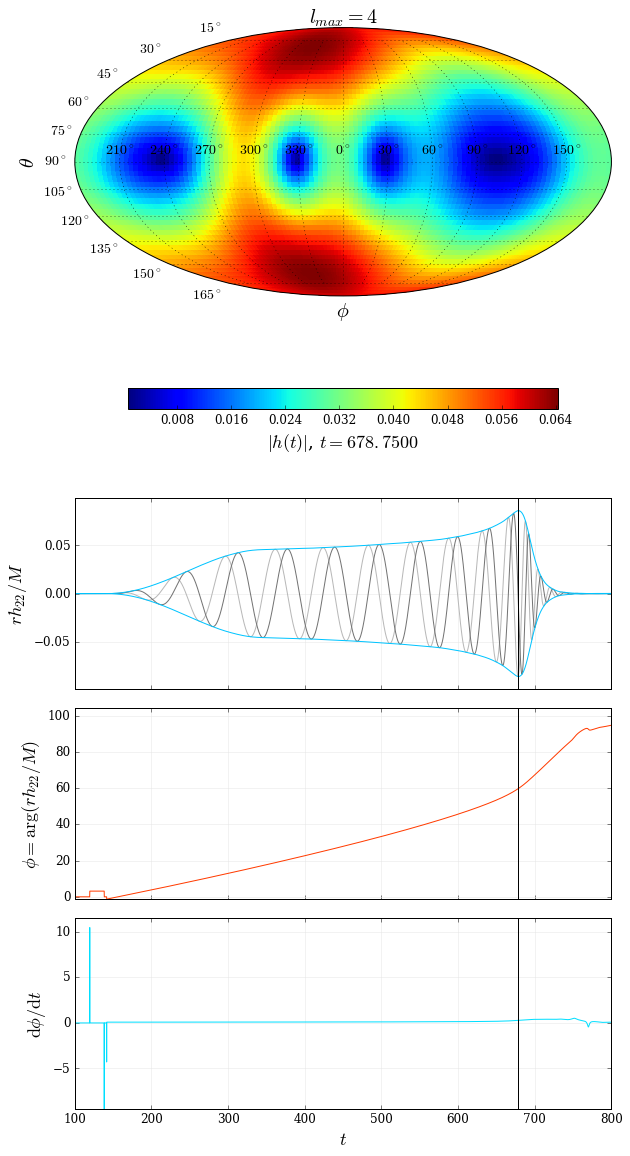

In [95]:

#
R,C = 6,3

#
fig = figure( figsize=3*array([C,1.0*R]) )

# 
ax4 = subplot2grid( (R,C), (0, 0), colspan=C, rowspan=3, projection='mollweide' )
ax1 = subplot2grid( (R,C), (3, 0), colspan=C)
ax2 = subplot2grid( (R,C), (4, 0), colspan=C, sharex=ax1)
ax3 = subplot2grid( (R,C), (5, 0), colspan=C, sharex=ax1)

#
kind = 'strain'

# Make mollweide plot -- NOTE that the time input is relative to the peak in h22
_,real_time = y.mollweide_plot(time=0,ax=ax4,form='abs',kind=kind,colorbar_shrink=0.8)
ax4.set_title('$l_{max} = %i$'%max([l for l,m in y.lm]),size=20)


#
wfax,_ = y.lm[2,2][kind].plot(ax=[ax1,ax2,ax3],tlim=[100,800])
for a in wfax:
    sca( a ); axvline( real_time, linestyle='-', color='k' )

#
subplots_adjust(hspace = 0.1)


### Now perhaps write an external script that animates frames for select time samples?

In [101]:
from os.path import join

In [102]:
range(0,100,10)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]